In [3]:
import os 
import json


# ha
IMG_NAME_LIST = ['ha_367.png', 'ha_84.png', 'ha_207.png', 'ha_2.png', 'ha_212.png', 'ha_399.png', 'ha_428.png', 'ha_172.png', 'ha_50.png', 'ha_1.png', 'ha_407.png', 'ha_201.png', 'ha_215.png', 'ha_5.png', 'ha_348.png', 'ha_54.png', 'ha_412.png', 'ha_174.png', 'ha_404.png', 'ha_202.png', 'ha_43.png', 'ha_377.png', 'ha_149.png', 'ha_106.png', 'ha_24.png', 'ha_476.png', 'ha_310.png', 'ha_489.png', 'ha_477.png', 'ha_311.png', 'ha_19.png', 'ha_107.png', 'ha_139.png', 'ha_111.png', 'ha_33.png', 'ha_27.png', 'ha_475.png', 'ha_32.png', 'ha_110.png', 'ha_128.png', 'ha_262.png', 'ha_288.png', 'ha_303.png', 'ha_301.png', 'ha_315.png', 'ha_329.png', 'ha_249.png', 'ha_314.png', 'ha_466.png', 'ha_116.png', 'ha_11.png', 'ha_443.png', 'ha_292.png', 'ha_244.png', 'ha_442.png', 'ha_132.png', 'ha_130.png', 'ha_124.png', 'ha_454.png', 'ha_497.png', 'ha_252.png', 'ha_284.png', 'ha_482.png', 'ha_131.png', 'ha_119.png', 'ha_451.png', 'ha_243.png', 'ha_257.png', 'ha_256.png', 'ha_16.png', 'ha_450.png', 'ha_122.png', 'ha_320.png', 'ha_334.png', 'ha_491.png', 'ha_268.png', 'ha_296.png', 'ha_241.png', 'ha_233.png', 'ha_384.png', 'ha_186.png', 'ha_151.png', 'ha_145.png', 'ha_184.png', 'ha_59.png', 'ha_9.png', 'ha_393.png', 'ha_344.png', 'ha_422.png', 'ha_185.png', 'ha_152.png', 'ha_368.png', 'ha_235.png', 'ha_221.png', 'ha_382.png', 'ha_396.png', 'ha_341.png', 'ha_380.png', 'ha_381.png', 'ha_342.png']
# fe
IMG_NAME_LIST = ['fe_382.png', 'fe_427.png', 'fe_291.png', 'fe_17.png', 'fe_22.png', 'fe_376.png', 'fe_193.png', 'fe_362.png', 'fe_253.png', 'fe_431.png', 'fe_393.png', 'fe_30.png', 'fe_10.png', 'fe_364.png', 'fe_442.png', 'fe_279.png', 'fe_42.png', 'fe_307.png', 'fe_356.png', 'fe_345.png', 'fe_385.png', 'fe_300.png', 'fe_91.png', 'fe_43.png', 'fe_38.png', 'fe_211.png', 'fe_212.png', 'fe_16.png', 'fe_153.png', 'fe_173.png', 'fe_406.png', 'fe_390.png', 'fe_84.png', 'fe_201.png', 'fe_93.png', 'fe_287.png', 'fe_2.png', 'fe_477.png', 'fe_396.png', 'fe_381.png', 'fe_472.png', 'fe_174.png', 'fe_475.png', 'fe_8.png', 'fe_451.png', 'fe_151.png', 'fe_69.png', 'fe_166.png', 'fe_46.png', 'fe_207.png', 'fe_29.png', 'fe_203.png', 'fe_226.png', 'fe_303.png', 'fe_420.png', 'fe_232.png', 'fe_7.png', 'fe_340.png', 'fe_249.png', 'fe_202.png', 'fe_313.png', 'fe_11.png', 'fe_53.png', 'fe_191.png', 'fe_271.png', 'fe_408.png', 'fe_349.png', 'fe_128.png', 'fe_449.png', 'fe_473.png', 'fe_185.png', 'fe_336.png', 'fe_260.png', 'fe_380.png', 'fe_197.png', 'fe_206.png', 'fe_125.png', 'fe_181.png', 'fe_441.png', 'fe_238.png', 'fe_110.png', 'fe_150.png', 'fe_184.png', 'fe_34.png', 'fe_204.png', 'fe_147.png', 'fe_95.png', 'fe_39.png', 'fe_236.png', 'fe_1.png', 'fe_237.png', 'fe_159.png', 'fe_26.png', 'fe_499.png', 'fe_143.png', 'fe_402.png', 'fe_57.png', 'fe_90.png', 'fe_417.png', 'fe_59.png', 'fe_5.png', 'fe_484.png']

In [4]:
# files
base_path = './data/fear/'
filenames = os.listdir(base_path)
filenames.sort()

In [5]:
popflag = False
for i in range(len(filenames)):
    if '.DS_Store' not in filenames[i]:
        filenames[i] = os.path.join(base_path, filenames[i])
    else:
        popflag = True
if popflag:
    filenames.pop(0)

In [6]:
filenames

['./data/fear/1_dongagent_fear.txt',
 './data/fear/2_imamura_fear.txt',
 './data/fear/3_tanaka_fear.txt',
 './data/fear/4_hirano_fear.txt',
 './data/fear/5_sun_fear.txt']

In [66]:
# utils
# run this first
def read_json_file(filePath):
    with open(filePath) as f:
        data = json.load(f)
    return data

def read_folder_of_data(exp, folderPath):
    fileNames = sorted(os.listdir(folderPath))
    results = []
    for i in fileNames:
        temp = os.path.join(folderPath, i)
        tempdata = read_json_file(temp)
        
        cleanedList = generateCleanList(exp, tempdata)
        temp_res = mergeFromPairwiseRating(cleanedList)
        temp_res.reverse()
        
        results.append([temp, temp_res])
    return results
        

def getImg(exp, img):
    if exp == 'happy':
        return img[0:] # happiness_selected_imgonly100/ha_106
    elif exp=='fear':
        return img[21:]

def generateCleanList(exp, temp_json):
    cleanedList = temp_json["payload"]['sortedlist']
#     print(cleanedList)
    for i, _ in enumerate(cleanedList):
        cleanedList[i] = getImg(exp, cleanedList[i])
    
    # old method
#     for i in temp_json["payload"]['pairwise_rating']:
#         tempimg1 = getImg(exp, i[0])
#         tempimg2 = getImg(exp, i[1])
#         cleanedList.append([tempimg1, tempimg2, i[2]])
    return cleanedList


## Demo

In [67]:
ima_res = []
ima_res = read_json_file(filenames[1])
temp_cleanedList = generateCleanList(exp, ima_res)
print(temp_cleanedList)

['fe_396.png', 'fe_17.png', 'fe_382.png', 'fe_93.png', 'fe_427.png', 'fe_232.png', 'fe_53.png', 'fe_5.png', 'fe_110.png', 'fe_29.png', 'fe_431.png', 'fe_166.png', 'fe_472.png', 'fe_313.png', 'fe_499.png', 'fe_147.png', 'fe_150.png', 'fe_1.png', 'fe_206.png', 'fe_91.png', 'fe_128.png', 'fe_484.png', 'fe_57.png', 'fe_385.png', 'fe_173.png', 'fe_84.png', 'fe_356.png', 'fe_202.png', 'fe_174.png', 'fe_59.png', 'fe_151.png', 'fe_475.png', 'fe_90.png', 'fe_253.png', 'fe_197.png', 'fe_181.png', 'fe_16.png', 'fe_287.png', 'fe_10.png', 'fe_362.png', 'fe_279.png', 'fe_39.png', 'fe_207.png', 'fe_336.png', 'fe_303.png', 'fe_43.png', 'fe_406.png', 'fe_390.png', 'fe_30.png', 'fe_441.png', 'fe_211.png', 'fe_417.png', 'fe_393.png', 'fe_7.png', 'fe_376.png', 'fe_159.png', 'fe_11.png', 'fe_260.png', 'fe_38.png', 'fe_191.png', 'fe_473.png', 'fe_185.png', 'fe_291.png', 'fe_340.png', 'fe_238.png', 'fe_249.png', 'fe_193.png', 'fe_271.png', 'fe_125.png', 'fe_408.png', 'fe_451.png', 'fe_442.png', 'fe_42.png', 

In [68]:

exp = 'fear'
# [[#ID 1, #res[]]]
result = []
counter = 1
for i in filenames:
    print(i)
    temp = read_json_file(i)
#     print(temp)
    temp_cleanedList = generateCleanList(exp, temp)
    # print(temp_merged_result)
    result.append([counter, temp_cleanedList])
    counter += 1
    

./data/fear/1_dongagent_fear.txt
./data/fear/2_imamura_fear.txt
./data/fear/3_tanaka_fear.txt
./data/fear/4_hirano_fear.txt
./data/fear/5_sun_fear.txt


In [69]:
print(result)

[[1, ['fe_313.png', 'fe_260.png', 'fe_181.png', 'fe_356.png', 'fe_53.png', 'fe_396.png', 'fe_91.png', 'fe_385.png', 'fe_93.png', 'fe_59.png', 'fe_472.png', 'fe_174.png', 'fe_427.png', 'fe_29.png', 'fe_5.png', 'fe_16.png', 'fe_202.png', 'fe_147.png', 'fe_499.png', 'fe_232.png', 'fe_475.png', 'fe_185.png', 'fe_43.png', 'fe_150.png', 'fe_380.png', 'fe_30.png', 'fe_484.png', 'fe_382.png', 'fe_39.png', 'fe_17.png', 'fe_110.png', 'fe_362.png', 'fe_431.png', 'fe_451.png', 'fe_287.png', 'fe_197.png', 'fe_376.png', 'fe_193.png', 'fe_449.png', 'fe_159.png', 'fe_125.png', 'fe_441.png', 'fe_477.png', 'fe_390.png', 'fe_173.png', 'fe_406.png', 'fe_249.png', 'fe_22.png', 'fe_90.png', 'fe_408.png', 'fe_381.png', 'fe_349.png', 'fe_10.png', 'fe_393.png', 'fe_211.png', 'fe_7.png', 'fe_1.png', 'fe_473.png', 'fe_128.png', 'fe_238.png', 'fe_151.png', 'fe_364.png', 'fe_84.png', 'fe_95.png', 'fe_46.png', 'fe_143.png', 'fe_345.png', 'fe_237.png', 'fe_204.png', 'fe_11.png', 'fe_153.png', 'fe_2.png', 'fe_420.png

In [70]:
with open("data/raw_data/fear_raw.json", 'r') as f:
    fear_raw = json.load(f)
    
# print(fear_raw)

fear_raw_name_only = [x[0] for x in fear_raw]
# print(fear_raw_name_only) # high to low # descending
# print(len(fear_raw_name_only))

temp = filter(lambda x: x in result[0][1], fear_raw_name_only)
fear_name_rank_order = list(enumerate(list(temp)))
# for i, name in enumerate(temp):
#     fear_name_rank_order.append([i+1, name])

fear_name_rank_order = {x[1]:x[0] for x in fear_name_rank_order}

In [71]:
print(fear_name_rank_order)

{'fe_313.png': 0, 'fe_499.png': 1, 'fe_191.png': 2, 'fe_197.png': 3, 'fe_472.png': 4, 'fe_336.png': 5, 'fe_84.png': 6, 'fe_53.png': 7, 'fe_30.png': 8, 'fe_356.png': 9, 'fe_382.png': 10, 'fe_147.png': 11, 'fe_57.png': 12, 'fe_427.png': 13, 'fe_202.png': 14, 'fe_150.png': 15, 'fe_475.png': 16, 'fe_396.png': 17, 'fe_29.png': 18, 'fe_174.png': 19, 'fe_380.png': 20, 'fe_59.png': 21, 'fe_390.png': 22, 'fe_125.png': 23, 'fe_110.png': 24, 'fe_16.png': 25, 'fe_232.png': 26, 'fe_212.png': 27, 'fe_477.png': 28, 'fe_91.png': 29, 'fe_173.png': 30, 'fe_7.png': 31, 'fe_408.png': 32, 'fe_5.png': 33, 'fe_10.png': 34, 'fe_17.png': 35, 'fe_484.png': 36, 'fe_385.png': 37, 'fe_95.png': 38, 'fe_287.png': 39, 'fe_181.png': 40, 'fe_185.png': 41, 'fe_303.png': 42, 'fe_441.png': 43, 'fe_402.png': 44, 'fe_406.png': 45, 'fe_93.png': 46, 'fe_211.png': 47, 'fe_1.png': 48, 'fe_349.png': 49, 'fe_46.png': 50, 'fe_431.png': 51, 'fe_38.png': 52, 'fe_166.png': 53, 'fe_362.png': 54, 'fe_449.png': 55, 'fe_249.png': 56, 'fe

In [73]:
# test for result 0
# jason
j_data = list(enumerate(result[0][1]))
print(j_data)


[(0, 'fe_313.png'), (1, 'fe_260.png'), (2, 'fe_181.png'), (3, 'fe_356.png'), (4, 'fe_53.png'), (5, 'fe_396.png'), (6, 'fe_91.png'), (7, 'fe_385.png'), (8, 'fe_93.png'), (9, 'fe_59.png'), (10, 'fe_472.png'), (11, 'fe_174.png'), (12, 'fe_427.png'), (13, 'fe_29.png'), (14, 'fe_5.png'), (15, 'fe_16.png'), (16, 'fe_202.png'), (17, 'fe_147.png'), (18, 'fe_499.png'), (19, 'fe_232.png'), (20, 'fe_475.png'), (21, 'fe_185.png'), (22, 'fe_43.png'), (23, 'fe_150.png'), (24, 'fe_380.png'), (25, 'fe_30.png'), (26, 'fe_484.png'), (27, 'fe_382.png'), (28, 'fe_39.png'), (29, 'fe_17.png'), (30, 'fe_110.png'), (31, 'fe_362.png'), (32, 'fe_431.png'), (33, 'fe_451.png'), (34, 'fe_287.png'), (35, 'fe_197.png'), (36, 'fe_376.png'), (37, 'fe_193.png'), (38, 'fe_449.png'), (39, 'fe_159.png'), (40, 'fe_125.png'), (41, 'fe_441.png'), (42, 'fe_477.png'), (43, 'fe_390.png'), (44, 'fe_173.png'), (45, 'fe_406.png'), (46, 'fe_249.png'), (47, 'fe_22.png'), (48, 'fe_90.png'), (49, 'fe_408.png'), (50, 'fe_381.png'), (51

In [74]:
# imamura
i_data = list(enumerate(result[1][1]))
print(i_data)

[(0, 'fe_396.png'), (1, 'fe_17.png'), (2, 'fe_382.png'), (3, 'fe_93.png'), (4, 'fe_427.png'), (5, 'fe_232.png'), (6, 'fe_53.png'), (7, 'fe_5.png'), (8, 'fe_110.png'), (9, 'fe_29.png'), (10, 'fe_431.png'), (11, 'fe_166.png'), (12, 'fe_472.png'), (13, 'fe_313.png'), (14, 'fe_499.png'), (15, 'fe_147.png'), (16, 'fe_150.png'), (17, 'fe_1.png'), (18, 'fe_206.png'), (19, 'fe_91.png'), (20, 'fe_128.png'), (21, 'fe_484.png'), (22, 'fe_57.png'), (23, 'fe_385.png'), (24, 'fe_173.png'), (25, 'fe_84.png'), (26, 'fe_356.png'), (27, 'fe_202.png'), (28, 'fe_174.png'), (29, 'fe_59.png'), (30, 'fe_151.png'), (31, 'fe_475.png'), (32, 'fe_90.png'), (33, 'fe_253.png'), (34, 'fe_197.png'), (35, 'fe_181.png'), (36, 'fe_16.png'), (37, 'fe_287.png'), (38, 'fe_10.png'), (39, 'fe_362.png'), (40, 'fe_279.png'), (41, 'fe_39.png'), (42, 'fe_207.png'), (43, 'fe_336.png'), (44, 'fe_303.png'), (45, 'fe_43.png'), (46, 'fe_406.png'), (47, 'fe_390.png'), (48, 'fe_30.png'), (49, 'fe_441.png'), (50, 'fe_211.png'), (51, 'f

In [84]:
# compute rank 
temp_list = []
for i, c in enumerate(j_data):
    temp_list.append((c, fear_name_rank_order[c[1]]))
temp_list.sort(key=lambda x:x[1])
# temp_list = [x[0] for x in temp_list]
print(temp_list)

[((0, 'fe_313.png'), 0), ((18, 'fe_499.png'), 1), ((84, 'fe_191.png'), 2), ((35, 'fe_197.png'), 3), ((10, 'fe_472.png'), 4), ((94, 'fe_336.png'), 5), ((62, 'fe_84.png'), 6), ((4, 'fe_53.png'), 7), ((25, 'fe_30.png'), 8), ((3, 'fe_356.png'), 9), ((27, 'fe_382.png'), 10), ((17, 'fe_147.png'), 11), ((100, 'fe_57.png'), 12), ((12, 'fe_427.png'), 13), ((16, 'fe_202.png'), 14), ((23, 'fe_150.png'), 15), ((20, 'fe_475.png'), 16), ((5, 'fe_396.png'), 17), ((13, 'fe_29.png'), 18), ((11, 'fe_174.png'), 19), ((24, 'fe_380.png'), 20), ((9, 'fe_59.png'), 21), ((43, 'fe_390.png'), 22), ((40, 'fe_125.png'), 23), ((30, 'fe_110.png'), 24), ((15, 'fe_16.png'), 25), ((19, 'fe_232.png'), 26), ((75, 'fe_212.png'), 27), ((42, 'fe_477.png'), 28), ((6, 'fe_91.png'), 29), ((44, 'fe_173.png'), 30), ((55, 'fe_7.png'), 31), ((49, 'fe_408.png'), 32), ((14, 'fe_5.png'), 33), ((52, 'fe_10.png'), 34), ((29, 'fe_17.png'), 35), ((26, 'fe_484.png'), 36), ((7, 'fe_385.png'), 37), ((63, 'fe_95.png'), 38), ((34, 'fe_287.pn

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]
[0, 18, 84, 35, 10, 94, 62, 4, 25, 3, 27, 17, 100, 12, 16, 23, 20, 5, 13, 11, 24, 9, 43, 40, 30, 15, 19, 75, 42, 6, 44, 55, 49, 14, 52, 29, 26, 7, 63, 34, 2, 21, 85, 41, 81, 45, 8, 54, 56, 51, 64, 32, 93, 83, 31, 38, 46, 48, 90, 74, 79, 87, 66, 70, 33, 71, 76, 92, 80, 77, 57, 73, 95, 53, 37, 1, 58, 89, 60, 22, 69, 39, 50, 78, 47, 98, 28, 36, 82, 65, 72, 61, 67, 86, 97, 99, 101, 59, 96, 91, 68, 88]


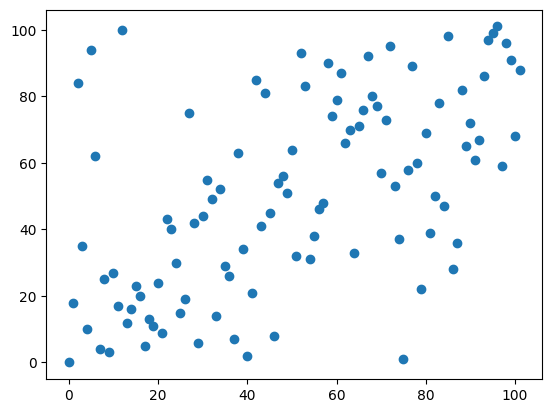

In [86]:
# scatter graph
x = [i[1] for i in temp_list]
y1 = [i[0][0] for i in temp_list]
print(x)
print(y)

plt.scatter(x, y)
plt.show()


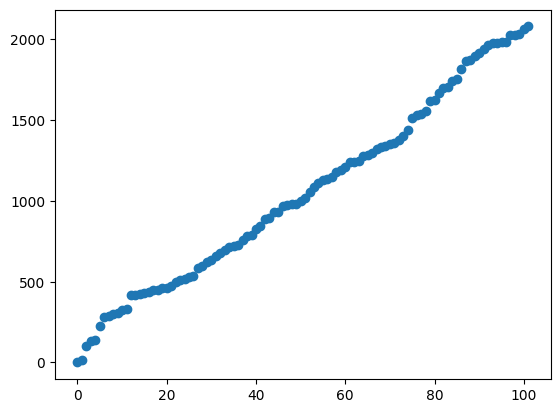

In [80]:
x = [i for i in range(102)]
y = []
temp_score = 0
for i in temp_list:
    tmp = abs(i[1] - i[0][0])
    temp_score += tmp
    y.append(temp_score)

import numpy as np
import matplotlib.pyplot as plt
x = np.array(x)
y = np.array(y)
plt.scatter(x, y)
plt.show()

[((13, 'fe_313.png'), 0), ((14, 'fe_499.png'), 1), ((59, 'fe_191.png'), 2), ((34, 'fe_197.png'), 3), ((12, 'fe_472.png'), 4), ((43, 'fe_336.png'), 5), ((25, 'fe_84.png'), 6), ((6, 'fe_53.png'), 7), ((48, 'fe_30.png'), 8), ((26, 'fe_356.png'), 9), ((2, 'fe_382.png'), 10), ((15, 'fe_147.png'), 11), ((22, 'fe_57.png'), 12), ((4, 'fe_427.png'), 13), ((27, 'fe_202.png'), 14), ((16, 'fe_150.png'), 15), ((31, 'fe_475.png'), 16), ((0, 'fe_396.png'), 17), ((9, 'fe_29.png'), 18), ((28, 'fe_174.png'), 19), ((77, 'fe_380.png'), 20), ((29, 'fe_59.png'), 21), ((47, 'fe_390.png'), 22), ((68, 'fe_125.png'), 23), ((8, 'fe_110.png'), 24), ((36, 'fe_16.png'), 25), ((5, 'fe_232.png'), 26), ((96, 'fe_212.png'), 27), ((74, 'fe_477.png'), 28), ((19, 'fe_91.png'), 29), ((24, 'fe_173.png'), 30), ((53, 'fe_7.png'), 31), ((69, 'fe_408.png'), 32), ((7, 'fe_5.png'), 33), ((38, 'fe_10.png'), 34), ((1, 'fe_17.png'), 35), ((21, 'fe_484.png'), 36), ((23, 'fe_385.png'), 37), ((82, 'fe_95.png'), 38), ((37, 'fe_287.png')

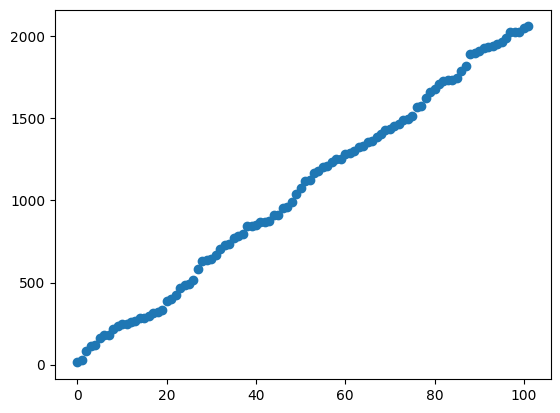

In [83]:
# compute rank 
temp_list = []
for i, c in enumerate(i_data):
    temp_list.append((c, fear_name_rank_order[c[1]]))
temp_list.sort(key=lambda x:x[1])
# temp_list = [x[0] for x in temp_list]
print(temp_list)

x = [i for i in range(102)]
y = []
temp_score = 0
for i in temp_list:
    tmp = abs(i[1] - i[0][0])
    temp_score += tmp
    y.append(temp_score)

import numpy as np
import matplotlib.pyplot as plt
x = np.array(x)
y = np.array(y)
plt.scatter(x, y)
plt.show()

In [117]:
print(temp_list)

[((0, 'fe_313.png'), 0), ((18, 'fe_499.png'), 1), ((84, 'fe_191.png'), 2), ((35, 'fe_197.png'), 3), ((10, 'fe_472.png'), 4), ((94, 'fe_336.png'), 5), ((62, 'fe_84.png'), 6), ((4, 'fe_53.png'), 7), ((25, 'fe_30.png'), 8), ((3, 'fe_356.png'), 9), ((27, 'fe_382.png'), 10), ((17, 'fe_147.png'), 11), ((100, 'fe_57.png'), 12), ((12, 'fe_427.png'), 13), ((16, 'fe_202.png'), 14), ((23, 'fe_150.png'), 15), ((20, 'fe_475.png'), 16), ((5, 'fe_396.png'), 17), ((13, 'fe_29.png'), 18), ((11, 'fe_174.png'), 19), ((24, 'fe_380.png'), 20), ((9, 'fe_59.png'), 21), ((43, 'fe_390.png'), 22), ((40, 'fe_125.png'), 23), ((30, 'fe_110.png'), 24), ((15, 'fe_16.png'), 25), ((19, 'fe_232.png'), 26), ((75, 'fe_212.png'), 27), ((42, 'fe_477.png'), 28), ((6, 'fe_91.png'), 29), ((44, 'fe_173.png'), 30), ((55, 'fe_7.png'), 31), ((49, 'fe_408.png'), 32), ((14, 'fe_5.png'), 33), ((52, 'fe_10.png'), 34), ((29, 'fe_17.png'), 35), ((26, 'fe_484.png'), 36), ((7, 'fe_385.png'), 37), ((63, 'fe_95.png'), 38), ((34, 'fe_287.pn

# Participant analysis

In [28]:
raw_img_name_list = ['ha_367.png', 'ha_84.png', 'ha_207.png', 'ha_2.png', 'ha_212.png', 'ha_399.png', 'ha_428.png', 'ha_172.png', 'ha_50.png', 'ha_1.png', 'ha_407.png', 'ha_201.png', 'ha_215.png', 'ha_5.png', 'ha_348.png', 'ha_54.png', 'ha_412.png', 'ha_174.png', 'ha_404.png', 'ha_202.png', 'ha_43.png', 'ha_377.png', 'ha_149.png', 'ha_106.png', 'ha_24.png', 'ha_476.png', 'ha_310.png', 'ha_489.png', 'ha_477.png', 'ha_311.png', 'ha_19.png', 'ha_107.png', 'ha_139.png', 'ha_111.png', 'ha_33.png', 'ha_27.png', 'ha_475.png', 'ha_32.png', 'ha_110.png', 'ha_128.png', 'ha_262.png', 'ha_288.png', 'ha_303.png', 'ha_301.png', 'ha_315.png', 'ha_329.png', 'ha_249.png', 'ha_314.png', 'ha_466.png', 'ha_116.png', 'ha_11.png', 'ha_443.png', 'ha_292.png', 'ha_244.png', 'ha_442.png', 'ha_132.png', 'ha_130.png', 'ha_124.png', 'ha_454.png', 'ha_497.png', 'ha_252.png', 'ha_284.png', 'ha_482.png', 'ha_131.png', 'ha_119.png', 'ha_451.png', 'ha_243.png', 'ha_257.png', 'ha_256.png', 'ha_16.png', 'ha_450.png', 'ha_122.png', 'ha_320.png', 'ha_334.png', 'ha_491.png', 'ha_268.png', 'ha_296.png', 'ha_241.png', 'ha_233.png', 'ha_384.png', 'ha_186.png', 'ha_151.png', 'ha_145.png', 'ha_184.png', 'ha_59.png', 'ha_9.png', 'ha_393.png', 'ha_344.png', 'ha_422.png', 'ha_185.png', 'ha_152.png', 'ha_368.png', 'ha_235.png', 'ha_221.png', 'ha_382.png', 'ha_396.png', 'ha_341.png', 'ha_380.png', 'ha_381.png', 'ha_342.png']
raw_img_score_dic = {x: 0 for x in raw_img_name_list}
print(raw_img_score_dic)

{'ha_367.png': 0, 'ha_84.png': 0, 'ha_207.png': 0, 'ha_2.png': 0, 'ha_212.png': 0, 'ha_399.png': 0, 'ha_428.png': 0, 'ha_172.png': 0, 'ha_50.png': 0, 'ha_1.png': 0, 'ha_407.png': 0, 'ha_201.png': 0, 'ha_215.png': 0, 'ha_5.png': 0, 'ha_348.png': 0, 'ha_54.png': 0, 'ha_412.png': 0, 'ha_174.png': 0, 'ha_404.png': 0, 'ha_202.png': 0, 'ha_43.png': 0, 'ha_377.png': 0, 'ha_149.png': 0, 'ha_106.png': 0, 'ha_24.png': 0, 'ha_476.png': 0, 'ha_310.png': 0, 'ha_489.png': 0, 'ha_477.png': 0, 'ha_311.png': 0, 'ha_19.png': 0, 'ha_107.png': 0, 'ha_139.png': 0, 'ha_111.png': 0, 'ha_33.png': 0, 'ha_27.png': 0, 'ha_475.png': 0, 'ha_32.png': 0, 'ha_110.png': 0, 'ha_128.png': 0, 'ha_262.png': 0, 'ha_288.png': 0, 'ha_303.png': 0, 'ha_301.png': 0, 'ha_315.png': 0, 'ha_329.png': 0, 'ha_249.png': 0, 'ha_314.png': 0, 'ha_466.png': 0, 'ha_116.png': 0, 'ha_11.png': 0, 'ha_443.png': 0, 'ha_292.png': 0, 'ha_244.png': 0, 'ha_442.png': 0, 'ha_132.png': 0, 'ha_130.png': 0, 'ha_124.png': 0, 'ha_454.png': 0, 'ha_497.png'

In [32]:
# use three participants result to generate a new list
def addScoreFromRes(res, my_dic):
    for i in range(len(res)):
        my_dic[res[i]] += i
    return my_dic

# add score from three participants
raw_img_score_dic = addScoreFromRes(res_zhengliang, raw_img_score_dic)
raw_img_score_dic = addScoreFromRes(res_zitang, raw_img_score_dic)
raw_img_score_dic = addScoreFromRes(res_yenju, raw_img_score_dic)
raw_img_score_dic = addScoreFromRes(res_dongsheng, raw_img_score_dic)

# sort the dic
sorted_img_score_dic = sorted(raw_img_score_dic.items(), key=lambda x: x[1], reverse=False)
print(sorted_img_score_dic)
    

[('ha_212.png', 74), ('ha_393.png', 84), ('ha_428.png', 96), ('ha_489.png', 110), ('ha_412.png', 112), ('ha_202.png', 150), ('ha_348.png', 152), ('ha_24.png', 154), ('ha_407.png', 160), ('ha_288.png', 162), ('ha_367.png', 172), ('ha_341.png', 174), ('ha_235.png', 180), ('ha_443.png', 182), ('ha_450.png', 186), ('ha_185.png', 186), ('ha_50.png', 194), ('ha_491.png', 198), ('ha_301.png', 212), ('ha_11.png', 212), ('ha_422.png', 212), ('ha_130.png', 220), ('ha_243.png', 222), ('ha_201.png', 228), ('ha_32.png', 256), ('ha_19.png', 258), ('ha_384.png', 260), ('ha_184.png', 262), ('ha_311.png', 276), ('ha_497.png', 276), ('ha_256.png', 276), ('ha_27.png', 296), ('ha_107.png', 302), ('ha_268.png', 312), ('ha_329.png', 320), ('ha_315.png', 340), ('ha_2.png', 344), ('ha_368.png', 346), ('ha_241.png', 348), ('ha_303.png', 364), ('ha_221.png', 366), ('ha_151.png', 368), ('ha_342.png', 372), ('ha_296.png', 384), ('ha_152.png', 384), ('ha_442.png', 394), ('ha_186.png', 400), ('ha_344.png', 400), ('

In [33]:
aver_4 = [x[0] for x in sorted_img_score_dic]
# aver_3.reverse()
# already reversed
print(aver_4)

['ha_212.png', 'ha_393.png', 'ha_428.png', 'ha_489.png', 'ha_412.png', 'ha_202.png', 'ha_348.png', 'ha_24.png', 'ha_407.png', 'ha_288.png', 'ha_367.png', 'ha_341.png', 'ha_235.png', 'ha_443.png', 'ha_450.png', 'ha_185.png', 'ha_50.png', 'ha_491.png', 'ha_301.png', 'ha_11.png', 'ha_422.png', 'ha_130.png', 'ha_243.png', 'ha_201.png', 'ha_32.png', 'ha_19.png', 'ha_384.png', 'ha_184.png', 'ha_311.png', 'ha_497.png', 'ha_256.png', 'ha_27.png', 'ha_107.png', 'ha_268.png', 'ha_329.png', 'ha_315.png', 'ha_2.png', 'ha_368.png', 'ha_241.png', 'ha_303.png', 'ha_221.png', 'ha_151.png', 'ha_342.png', 'ha_296.png', 'ha_152.png', 'ha_442.png', 'ha_186.png', 'ha_344.png', 'ha_215.png', 'ha_320.png', 'ha_149.png', 'ha_122.png', 'ha_54.png', 'ha_476.png', 'ha_106.png', 'ha_249.png', 'ha_132.png', 'ha_33.png', 'ha_207.png', 'ha_451.png', 'ha_172.png', 'ha_244.png', 'ha_454.png', 'ha_43.png', 'ha_131.png', 'ha_377.png', 'ha_396.png', 'ha_284.png', 'ha_59.png', 'ha_1.png', 'ha_252.png', 'ha_466.png', 'ha_1

In [34]:
print(aver_4[:5])

['ha_212.png', 'ha_393.png', 'ha_428.png', 'ha_489.png', 'ha_412.png']
